

# Project 3: Investigate the TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

<a id='intro'></a>

> <font color= blue>
The TMDb Movie dataset has been selected for analysis. The dataset is a collection of information on around 10000 movies. For each movie, the dataset includes information on aspects such as popularity, budget, revenue, cast, directors, production house, date of release, runtime, and its rating. 
<br>
<br>
RESEARCH QUESTIONS:
1. How have movie production trends varied over the years?
2a. What are the top 20 highest grossing movies? 
2b. What are the top 20 most expensive movies? 
3. How do budgets correlate with revenues? Do higher budget movies have higher revenue?
4. Do certain months of release associate with better revenues?
5. Which months have seen the maximum releases?
6. How do ratings correlate with commercial success (profits)?
7. What run times are associated with each genre?
8. Who are the top 20 directors who made highly rated films? The directors considered for  should have made atleast 5 movies in    the time period 1960 - 2015 represented in the dataset.


 




In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### Loading data

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
db=pd.read_csv('tmdb_movies.csv')
db.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


### No. of rows and columns in the dataframe

In [3]:
db.shape

(10866, 21)

> <font color= blue>
The dataset has information about 10866 movies on 21 aspects (columns) for each of them  
</font>


### Pick columns of interest and load into the dataframe to be used for analysis

In [4]:
columns_reqd=['id','popularity','budget','revenue','original_title','director','runtime','genres','production_companies','vote_count','vote_average','release_date','release_year']
df=db[columns_reqd]
df.head()


,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,6/9/15,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,5/13/15,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,3/18/15,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,12/15/15,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,4/1/15,2015


### Checking data types of columns

In [5]:
df.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
director                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
release_date             object
release_year              int64
dtype: object

> <font color= blue>
Data cleaning issue:
The datatype for release_date is 'object' and it would be convenient to convert this to a date type for analysis. This is identified as one of the data cleaning steps. 
</font>


### Check for columns containing  null values

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_date            10866 non-null object
release_year            10866 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


### List out columns with null values

In [7]:
 df.columns[df.isnull().any()].tolist()

['director', 'genres', 'production_companies']

### Number of rows with null values

In [8]:
df.isnull().any(axis=1).sum()

1059

> <font color= blue>
These rows with null values need to be removed. But the null values occur only in the columns above. So these rows can be removed when the analysis involves the columns containing nulls

### Number of duplicate rows in the dataset

In [9]:
sum(df.duplicated())

1

### Print out the duplicate row

In [10]:
for i,v in df.duplicated().iteritems():
    if (v):
        print (df.loc[i])

id                                                            42194
popularity                                                  0.59643
budget                                                     30000000
revenue                                                      967000
original_title                                               TEKKEN
director                                           Dwight H. Little
runtime                                                          92
genres                  Crime|Drama|Action|Thriller|Science Fiction
production_companies                         Namco|Light Song Films
vote_count                                                      110
vote_average                                                      5
release_date                                                3/20/10
release_year                                                   2010
Name: 2090, dtype: object


> <font color= blue>
Data cleaning issue:
This is a duplicate and record needs to be removed from the database 
</font>


### Look at summary statistics for numerical columns to assess data and build intuition

In [11]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


> <font color= blue>
We see that the min value for budget and revenue is zero. This looks like they should have been null values if data was not available. It is outside the scope of this project to procure actual data for movies with zero budget and revenue. Hence, these records will not be considered for analysis in research questions where budget and revenue are involved. 
</font>

### Data Cleaning

 ### Step 1: Convert 'release_date' to datetime from 'object' (string)

In [12]:
df['release_date']=pd.to_datetime(df['release_date'],format='%m/%d/%y')
pd.options.mode.chained_assignment = None



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Checking data types to make sure the conversion went through

In [13]:
df.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
director                        object
runtime                          int64
genres                          object
production_companies            object
vote_count                       int64
vote_average                   float64
release_date            datetime64[ns]
release_year                     int64
dtype: object

> <font color= blue>
The release_date field has been converted to type datetime. All datatypes are now relevant to the context of the columns.

### Step 2: Remove duplicate rows from dataframe
> <font color= blue>
We found one duplicate row while assessing the data. That row will now be removed from the dataframe

In [14]:
df.drop_duplicates(inplace = True)

### Check that there are no duplicates in the dataframe

In [15]:
sum(df.duplicated())

0

> <font color= blue>
We found two other issues: Rows containing null values, and rows containing zero for budget and revenue fields. If we remove those rows now, we will lose data for other fields that have values relevant to the question being answered. So we will deal with these issues under the exploration for each research question.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 :  How have movie production trends varied over the years?

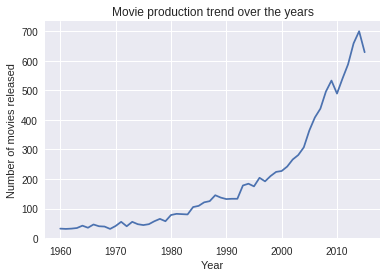

In [16]:
# Number of movies produced each year
movies_per_year= df['release_year'].value_counts().sort_index();
plt.plot(movies_per_year);
plt.title('Movie production trend over the years');
plt.xlabel('Year');
plt.ylabel('Number of movies released');

In [17]:
#Years with maximum and minimum movie production  
movies_per_year.idxmax() , movies_per_year.idxmin()

(2014, 1961)

> <font color= blue>
Movie production has increased over the years from 1960 to 2015. The decade of 2000 - 2010 shows a steep increase in production compared to previous decades.  The year 2014 with 700 movies, is the year of maximum movie production, and 1961 with 31 movies has been the year of least production

### Research Question 2a:     What are the top 20 highest grossing movies? 

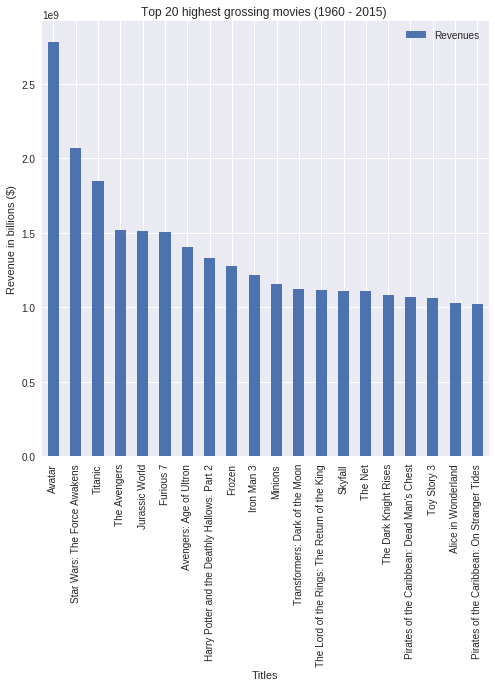

In [18]:
sorted_revenue = df['revenue'].sort_values(ascending=False)[:20]

high_grossers=pd.DataFrame()
titles=[]
revenues=[]
for i in sorted_revenue.index:
    titles.append(df.loc[i,'original_title'])
    revenues.append(sorted_revenue.loc[i])
high_grossers['Titles']=titles
high_grossers['Revenues']=revenues
high_grossers.set_index('Titles',inplace=True)
high_grossers.plot(kind ='bar',figsize=(8,8))
plt.title('Top 20 highest grossing movies (1960 - 2015) ');
plt.ylabel('Revenue in billions ($)');


In [19]:
#List of top 20 highest grossing movies and their revenue

high_grossers

,Revenues
Titles,
Avatar,2781505847
Star Wars: The Force Awakens,2068178225
Titanic,1845034188
The Avengers,1519557910
Jurassic World,1513528810
Furious 7,1506249360
Avengers: Age of Ultron,1405035767
Harry Potter and the Deathly Hallows: Part 2,1327817822
Frozen,1274219009


> <font color= blue>
The highest grossing movie over the time period 1960 - 2015 has been Avatar with a revenue of 2.8 billion dollars. 

 ### Research Question 2b: What are the top 20 most expensive movies?

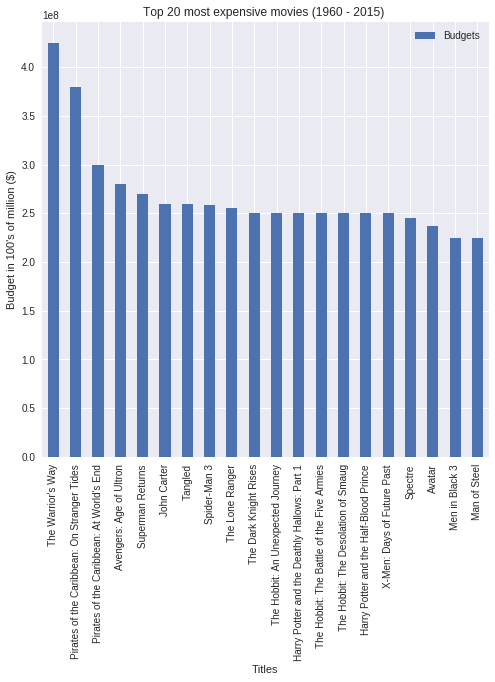

In [20]:
sorted_budget = df['budget'].sort_values(ascending=False)[:20]
high_budget=pd.DataFrame()
titles_exp=[]
budgets=[]
for i in sorted_budget.index:
    titles_exp.append(df.loc[i,'original_title'])
    budgets.append(sorted_budget.loc[i])
high_budget['Titles']=titles_exp
high_budget['Budgets']=budgets
high_budget.set_index('Titles',inplace=True)
high_budget.plot(kind ='bar',figsize=(8,8))
plt.title('Top 20 most expensive movies (1960 - 2015) ');
plt.ylabel('Budget in 100\'s of million ($)');

In [21]:
high_budget

,Budgets
Titles,
The Warrior's Way,425000000
Pirates of the Caribbean: On Stranger Tides,380000000
Pirates of the Caribbean: At World's End,300000000
Avengers: Age of Ultron,280000000
Superman Returns,270000000
John Carter,260000000
Tangled,260000000
Spider-Man 3,258000000
The Lone Ranger,255000000


> <font color= blue>
The most expensive movie (highest budget) over the time period 1960 - 2015 has been The Warrior's way. This movie does not feature in the top 20 grossing movies. 

### Research Question 3: How do budgets correlate with revenues? Do high budgets mean high revenues?

In [22]:
# Explore the Budget and Revenue columns - find rows with zeros for budget and revenue

cols=['budget','revenue','release_date']

len(df[(df['budget']==0) | (df['revenue']==0)])


7011

> <font color= blue>
There are 7011 rows where budget or revenue is zero. For the purpose of this analysis, zeros are treated as missing values. Records that have missing / zero budget or revenue data are ignored and a subset of data with non zero budgets and revenues is used for the analysis. 

In [23]:
df2=df[(df['budget']>0) & (df['revenue']>0)]
df2.shape

(3854, 13)

> <font color= blue>
This dataframe with 3854 records will be used to find the correlation between budget and revenue

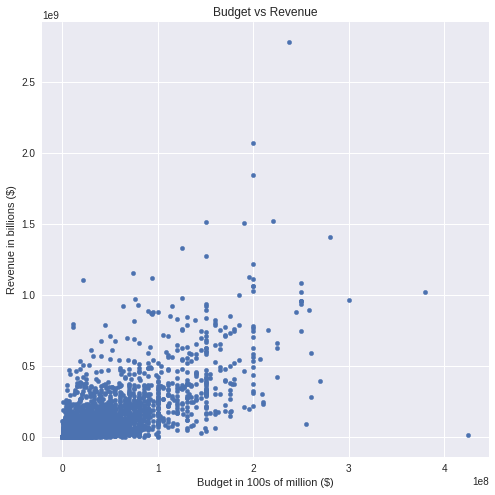

In [24]:
df2.plot(x='budget',y='revenue',kind='scatter',figsize=(8,8));
plt.title('Budget vs Revenue')
plt.xlabel('Budget in 100s of million ($)');
plt.ylabel('Revenue in billions ($)');


### Calculation of Pearson's correlation coefficient

In [25]:
def correlation_coeff(x,y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
    return(std_x*std_y).mean()

correlation_coeff(df2['budget'],df2['revenue'])


0.68855615246367408

> <font color= blue>
From the uphill scatterplot and the value of 0.69 for the Pearson's coefficient we can infer that there is a positive relationship between budget and revenue. However , not a perfectly positive correlation. It can be seen from the plot that there are some movies with high budgets but low revenues and some with low budgets and high revenues. The outliers are more with high budget movies which get low/ moderate revenues. 

### Research Question 4: Do certain months of release associate with better revenues?

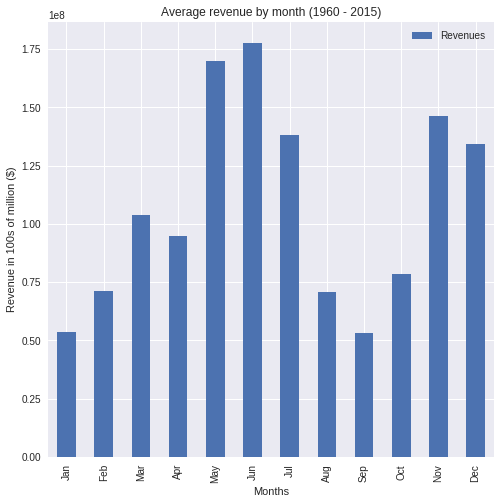

In [26]:
# Extract the month of release for every movie in a new column

df2['release_month']=df2['release_date'].dt.month

revenue_by_month = df2.groupby('release_month')['revenue'].mean()
df3=pd.DataFrame()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df3['Months']=months
df3['Revenues'] = list(revenue_by_month.get_values())
df3.plot(x='Months',y='Revenues',kind='bar',figsize=(8,8));
plt.title('Average revenue by month (1960 - 2015)');
plt.ylabel('Revenue in 100s of million ($)');

In [27]:
revenue_by_month

release_month
1     5.342218e+07
2     7.135161e+07
3     1.035897e+08
4     9.461571e+07
5     1.697212e+08
6     1.777592e+08
7     1.382660e+08
8     7.073754e+07
9     5.302878e+07
10    7.841869e+07
11    1.464266e+08
12    1.343913e+08
Name: revenue, dtype: float64

> <font color= blue>
June and May seem to be the months that have had the greatest revenue- It could partially be attributed to better turnout in the theatres because of summer vacations and nice weather, maybe. Nov and Dec have seen high revenues as well - It could be because of the holiday season and more turnout in theatres

### Research Question 5: Which months have seen the maximum releases?

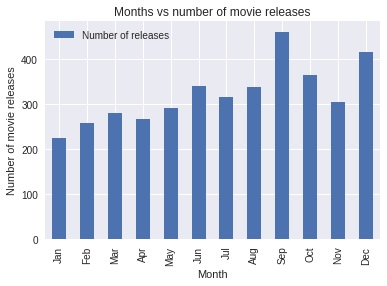

In [28]:
numreleases_month= df2.release_month.value_counts().sort_index()
df4=pd.DataFrame()
df4['Months']=months
df4['Number of releases']=numreleases_month.get_values()
df4.plot(x='Months',y='Number of releases',kind='bar');
plt.title('Months vs number of movie releases');
plt.ylabel('Number of movie releases');
plt.xlabel('Month');

> <font color= blue>
September has seen the most releases followed by December

### Research Question 6: How do ratings correlate with commercial success (profits)?

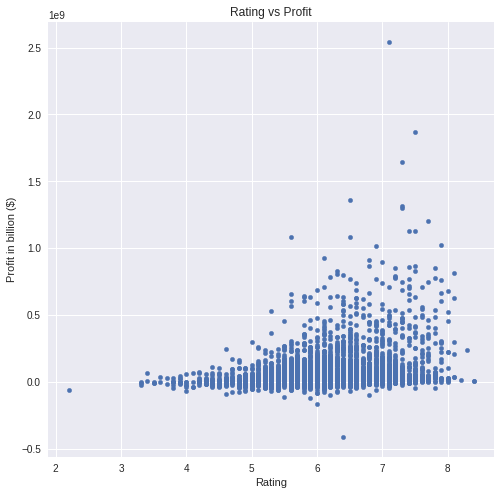

In [29]:
df2['Profit']=df2['revenue']-df2['budget']
df2.plot(x='vote_average',y='Profit',kind='scatter',figsize=(8,8));
plt.ylabel('Profit in billion ($)');
plt.xlabel('Rating');
plt.title('Rating vs Profit');

In [30]:
correlation_coeff(df2['vote_average'],df2['Profit'])

0.25943499037670154

> <font color= blue>
The rating (vote_average) and profits appear to have a weak positive (uphill) relationship implying that a high rating does not strongly correlate to high profits.


### Research Question 7: What run times are associated with each genre?

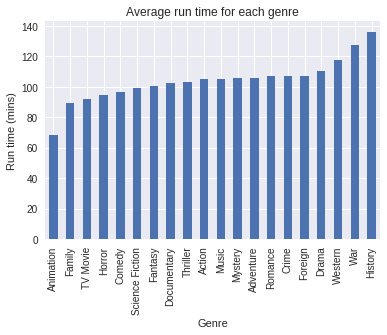

In [31]:
# Drop rows with null values in genre and director columns
df.dropna(subset=['genres'],inplace=True)

#Converting the 'genre' column into a list of genres by solitting at the pipe symbol
df['genres']= np.where((df['genres'].str.contains('\|')), df['genres'].str.split('|'), df['genres'])

#Making sure every row has data as a list, even if only one genre is present
df.loc[:, 'genres'] = df.genres.apply(np.atleast_1d)

# Horizontally stacking all the lists from all rows into one big list
all_genres = np.hstack(df.genres)

# n contains the runtime for that row while l contains the list of genres for that row 
#Repeating the runtime as many times as the length of list l and merging it all into one list
all_runtimes=[]
for n,l in df[['runtime','genres']].values:
    all_runtimes=all_runtimes+([n]*len(l))
    
# Assigning the merged lists / arrays to a new dataframe 
a = pd.DataFrame({'genre':all_genres, 'runtime':all_runtimes})

# Group by genre and find the average of runtimes sorted in ascending order
runtime_by_genre=a.sort_values(['runtime']).groupby('genre')['runtime'].mean()
runtime_by_genre.sort_values().plot(kind='bar');
plt.title('Average run time for each genre');
plt.ylabel('Run time (mins)');
plt.xlabel('Genre');

> <font color= blue>
History is the genre with the longest movies while animation movies are the shortest.    


### Research Question 8: Who are the top 20 directors who made highly rated films? 

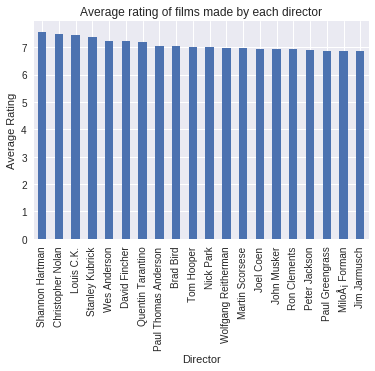

In [32]:
# Drop rows with null values in the director column
df.dropna(subset=['director'],inplace=True)

#Converting the column into a list of directors by splitting at the pipe symbol
df['director']= np.where((df['director'].str.contains('\|')), df['director'].str.split('|'), df['director'])

#Making sure every row has data as a list, even if only one director is present
df.loc[:, 'director'] = df.director.apply(np.atleast_1d)

# Horizontally stacking all the lists from all rows into one big list
all_directors = np.hstack(df.director)

# n contains the rating for that row while l contains the list of directors for that row 
#Repeating n as many times as the length of list l and merging it all into one list
all_ratings=[]
for n,l in df[['vote_average','director']].values:
    all_ratings=all_ratings+([n]*len(l))
    
# Assigning the merged lists / arrays to a new dataframe 
c = pd.DataFrame({'Director':all_directors, 'Rating':all_ratings})


director_counts = c['Director'].value_counts() 

# Create a list of directors who have made more than 5 movies 
consider=(director_counts[director_counts>5])
directors_considered= list(consider.index)

# Creating a new dataframe with information on the directors from the above list
d=c[c['Director'].isin(directors_considered)]

# Plotting based on highest average ratings (top 20 directors)
rating_by_director=d.sort_values(['Rating']).groupby('Director')['Rating'].mean()
rating_by_director.sort_values(ascending = False)[:20].plot(kind='bar');
plt.title('Average rating of films made by each director');
plt.ylabel('Average Rating');
plt.xlabel('Director');

In [33]:
rating_by_director.sort_values(ascending = False)[:20]

Director
Shannon Hartman         7.566667
Christopher Nolan       7.470000
Louis C.K.              7.433333
Stanley Kubrick         7.388889
Wes Anderson            7.245455
David Fincher           7.210000
Quentin Tarantino       7.207143
Paul Thomas Anderson    7.037500
Brad Bird               7.033333
Tom Hooper              7.016667
Nick Park               7.000000
Wolfgang Reitherman     6.975000
Martin Scorsese         6.970968
Joel Coen               6.952941
John Musker             6.933333
Ron Clements            6.933333
Peter Jackson           6.885714
Paul Greengrass         6.866667
MiloÅ¡ Forman           6.862500
Jim Jarmusch            6.845455
Name: Rating, dtype: float64

> <font color= blue>
It seems reasonable to consider only directors who have made more than 5 movies in the time period 1960 - 2015 represented in the dataset because the time period is large and the ranking is done over a large number of directors. The above are top 20 directors (who have more than 5 films) who made highly rated films, with the average ratings of their films.


<a id='conclusions'></a>
## Conclusions
> <font color= blue>
The dataset was assessed and necessary cleaning steps were performed as documented above. Datatypes were made relevant to the context of the columns, duplicates were removed and zeros and null values were dealt with under the exploration of each research question, according to the reasoning provided.
Removal of rows containing nulls and/or zeros reduced the data available for analysis, which may impact the results. The correlations explained do not imply causations. The inferences made are tentative and have scope for further refinement. 
<br>
The analysis identifies the top 20 highest grossing movies, top 20 most expensive movies,  months with the most movie releases,  run times associated with each genre, and top 20 directors based on the rating of their films
 <br>
The analysis also explores the correlation of budgets with revenues, association of month of release with better revenues, and correlation of ratings with commercial success. 
<br>
<br>
I have referred to Stack Overflow and Udacity Slack forums for help to complete the analysis. 



In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0